In [142]:
#purpose of challenge: Predict who is likely to survive the Titanic crash given the data

#insert packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [143]:
#import the data

training = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

training ['train_test'] = 1
test ['train_test'] = 0
test ['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

/Users/belgutei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'train_test'],
      dtype='object')

In [144]:
#Light Data Exploration
training.info()
training.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
train_test     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [145]:
#look at numeric and categorical values separately

df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [146]:
# fill null age values with median age in order to plot histograms
df_num['Age'].fillna(df_num['Age'].median(), inplace = True) 

# fill null embarked values with mode
df_cat['Embarked'].fillna(df_cat['Embarked'].mode()[0], inplace = True) 


/Users/belgutei/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


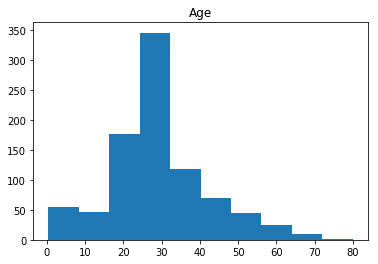

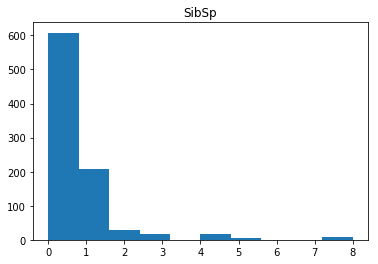

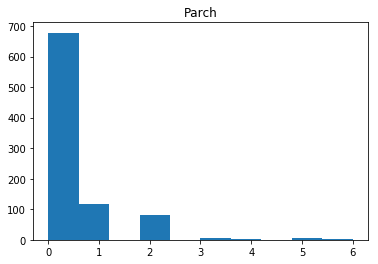

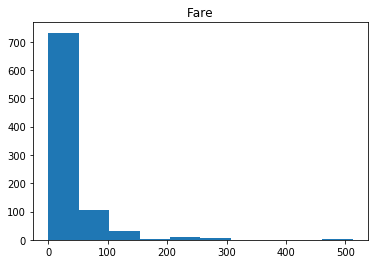

In [147]:
#distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.233296 -0.172482  0.096688
SibSp -0.233296  1.000000  0.414838  0.159651
Parch -0.172482  0.414838  1.000000  0.216225
Fare   0.096688  0.159651  0.216225  1.000000


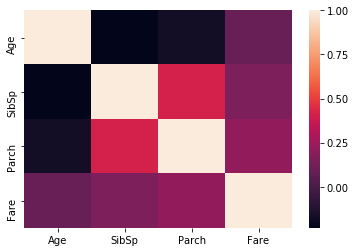

In [148]:
#correlations between numerical columns of dataset
#helps understand different relationships between data

print(df_num.corr())
sns.heatmap(df_num.corr())

In [149]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


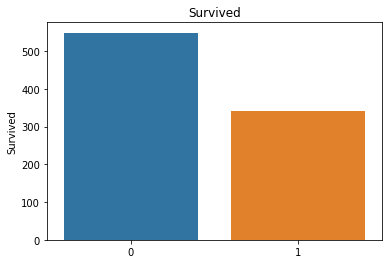

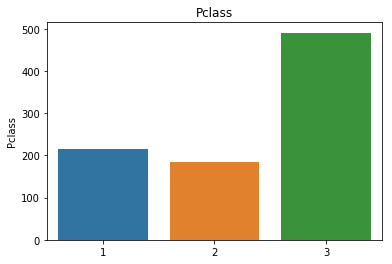

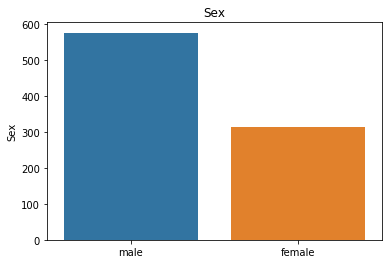

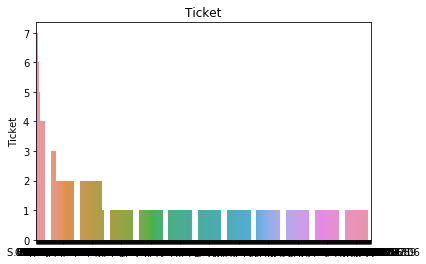

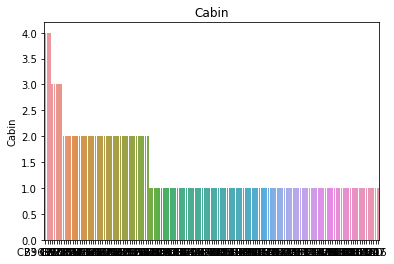

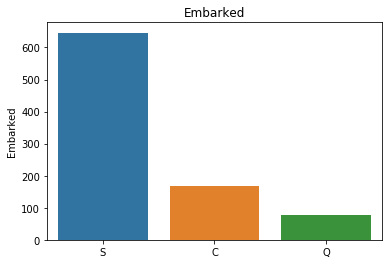

In [150]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()

In [151]:
#Comparing survival rate in each of categorical columns through pivot tables
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc = 'count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [152]:
#Feature engineering - examine the cabin column

df_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split('x')))
training['cabin_multiple'].value_counts()


0    687
1    204
Name: cabin_multiple, dtype: int64

In [153]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1
Survived,,
0,481,68
1,206,136


In [154]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])

In [155]:
#comparing surivial rate by cabin
print(training.cabin_adv.value_counts())
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [156]:
#understand ticket values better
#numeric vs non numeric 
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [157]:
#difference in numeric vs non-numeric tickets in survival rate; no correlation
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


(889,)

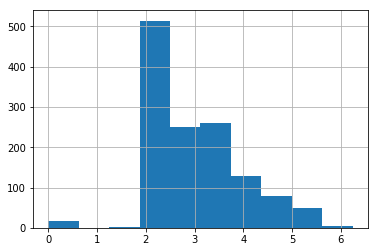

In [158]:
#Data preprocessing for model
#include only relevent variables and drop null values from variables

#create all categorical varaibles for both training and test sets
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)

#complete nulls for continuous data
all_data.Age = all_data.Age.fillna(training.Age.median ())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

#drop null embarked rows.
all_data.dropna(subset = ['Embarked'], inplace = True)

#normalize the fare distribution
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

#convert fare to category for pd.get_dummies()
all_data.Pclass = all_data.Pclass.astype(str)

#create dummy variables from categories
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','train_test']])

#Split to train test again
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived
y_train.shape

In [159]:
#Scale data 0-1 to prepare for the models
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age','SibSp','Parch','norm_fare']]= scale.fit_transform(all_dummies_scaled[['Age','SibSp','Parch','norm_fare']])
all_dummies_scaled

X_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = all_data[all_data.train_test==1].Survived

In [160]:
#cross validation - randomly samples on training data. running model on training data to make predictions

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [161]:
#Naive Bayes Classification
gnb = GaussianNB()
cv = cross_val_score(gnb, X_train_scaled, y_train, cv=5)
print(cv)
print (cv.mean())

[0.67977528 0.6741573  0.71910112 0.73033708 0.79096045]
0.718866247698851


In [162]:
#Logistic Regression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train, cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.80898876 0.78651685 0.78651685 0.81920904]
0.7975496730781438


In [163]:
#Logistic Regression  on scaled X_train
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_scaled,y_train, cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.80898876 0.78089888 0.79775281 0.82485876]
0.7998032120865867


In [164]:
#Decision Tree Classifier
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score (dt, X_train, y_train, cv =5)
print(cv)
print(cv.mean())

[0.73595506 0.75842697 0.81460674 0.76404494 0.83050847]
0.7807084364882879


In [165]:
#Decision Tree Classifier on scaled X_train
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score (dt, X_train_scaled, y_train, cv =5)
print(cv)
print(cv.mean())

[0.74157303 0.75842697 0.81460674 0.76404494 0.83050847]
0.7818320319939059


In [166]:
#K Nearest Neighbors

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.78651685 0.76966292 0.7752809  0.81460674 0.81920904]
0.7930552910556719


In [167]:
#K Nearest Neighbors on scaled X_train
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76966292 0.78651685 0.80337079 0.80337079 0.83050847]
0.7986859645781756


In [168]:
#Random Forest Classifier

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7752809  0.79775281 0.84831461 0.75842697 0.84745763]
0.8054465816035041


In [169]:
#Support Vector Classifier

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.82022472 0.82022472 0.80898876 0.79213483 0.81920904]
0.8121564146511776


In [170]:
#Voting classifier takes all of the inputs and averages the results. 
#For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote.
#A "soft" classifier averages the confidence of each of the models. 
#If a the average confidence is > 50% that it is a 1 it will be counted as such

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc)], voting = 'soft') 

In [171]:
cv = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empt

[0.78651685 0.80337079 0.82022472 0.81460674 0.84180791]
0.813305402145623


/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [172]:
voting_clf.fit(X_train_scaled,y_train)
y_hat_base_vc = voting_clf.predict(X_test_scaled).astype(int)
basic_submission = {'PassengerId': test.PassengerId, 'Survived': y_hat_base_vc}
base_submission = pd.DataFrame(data=basic_submission)
base_submission.to_csv('base_submission.csv', index=False)

/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [178]:
#performance tuning the RandomForestClassifier, the highest result model

from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

#simple performance reporting function
def clf_performance(classifier, model_name):
    
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))


In [179]:


rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 11.6min finished


Random Forest
Best Score: 0.8278965129358831
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 450}


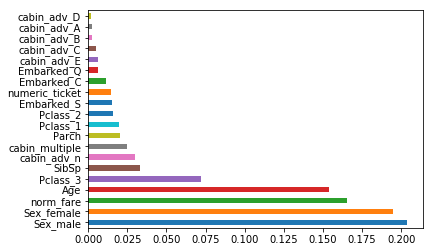

In [180]:
#plotting feature importances 
#sex and age and room fare have largest impact
best_rf = best_clf_rf.best_estimator_.fit(X_train_scaled,y_train)
feat_importances = pd.Series(best_rf.feature_importances_, index=X_train_scaled.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [183]:
#Make Predictions 


voting_clf_hard = VotingClassifier(estimators = [('knn',knn),('rf',best_rf),('svc',svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('knn',knn),('rf',best_rf),('svc',svc)], voting = 'soft') 
voting_clf_all = VotingClassifier(estimators = [('knn',knn),('rf',best_rf),('svc',svc), ('lr', lr)], voting = 'soft') 


voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_all.fit(X_train_scaled, y_train)


best_rf.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_rf = best_rf.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_all = voting_clf_all.predict(X_test_scaled).astype(int)


/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/belgutei/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [184]:
#convert output to dataframe 
final_data = {'PassengerId': test.PassengerId, 'Survived': y_hat_rf}
submission = pd.DataFrame(data=final_data)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_4 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_all}
submission_4 = pd.DataFrame(data=final_data_4)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_rf': y_hat_rf, 'Survived_vc_soft' : y_hat_vc_soft, 'Survived_vc_all' : y_hat_vc_all}
comparison = pd.DataFrame(data=final_data_comp)

In [185]:
#track differences between outputs 
comparison['difference_rf_vc_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_rf else 0, axis =1)
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison['difference_hard_all'] = comparison.apply(lambda x: 1 if x.Survived_vc_all != x.Survived_vc_hard else 0, axis =1)

In [186]:
comparison.difference_hard_all.value_counts()

0    402
1     16
Name: difference_hard_all, dtype: int64

In [187]:
#prepare submission files 
submission.to_csv('submission_rf.csv', index =False)
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_4.to_csv('submission_vc_all.csv', index=False)